# Análise Exploratória de Dados (EDA)

Este notebook realiza a coleta e análise exploratória de ações de empresas de tecnologia que estão investindo em inteligência artificial.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configurações básicas
plt.style.use('ggplot')
%matplotlib inline


## Seleção de empresas
Selecionamos empresas conhecidas por investir fortemente em IA:

In [3]:
# Dicionário com nome e ticker das empresas
companies = {
    "NVIDIA": "NVDA",
    "Microsoft": "MSFT",
    "Alphabet (Google)": "GOOGL",
    "Meta (Facebook)": "META",
    "Amazon": "AMZN",
    "Apple": "AAPL"
}


## Coleta de dados históricos
Vamos coletar os dados de preços dos últimos 2 anos.

In [4]:
# Baixando dados com yfinance
data = yf.download(list(companies.values()), start="2023-01-01", end="2025-01-01")["Close"]
data.columns = companies.keys()  # renomeia as colunas com nomes legíveis
data.head()


/tmp/ipykernel_15960/2472736347.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(companies.values()), start="2023-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  6 of 6 completed


,NVIDIA,Microsoft,Alphabet (Google),Meta (Facebook),Amazon,Apple
Date,,,,,,
2023-01-03,123.470604,85.820000,88.588707,124.059402,234.808929,14.302286
2023-01-04,124.744118,85.139999,87.554909,126.675049,224.537674,14.735902
2023-01-05,123.421257,83.120003,85.686111,126.247398,217.882874,14.252331
2023-01-06,127.962433,86.080002,86.819313,129.310593,220.450684,14.845803
2023-01-09,128.485641,87.360001,87.495255,128.763580,222.597076,15.614121


## Visualização dos preços de fechamento

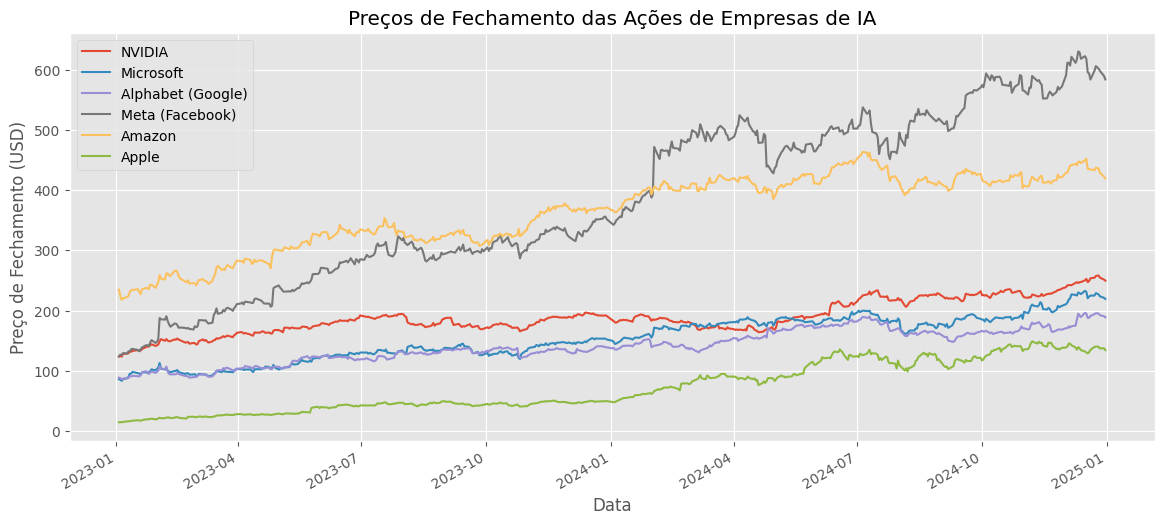

In [5]:
# Plotando os preços
data.plot(figsize=(14, 6), title="Preços de Fechamento das Ações de Empresas de IA")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (USD)")
plt.show()


## Retornos Diários

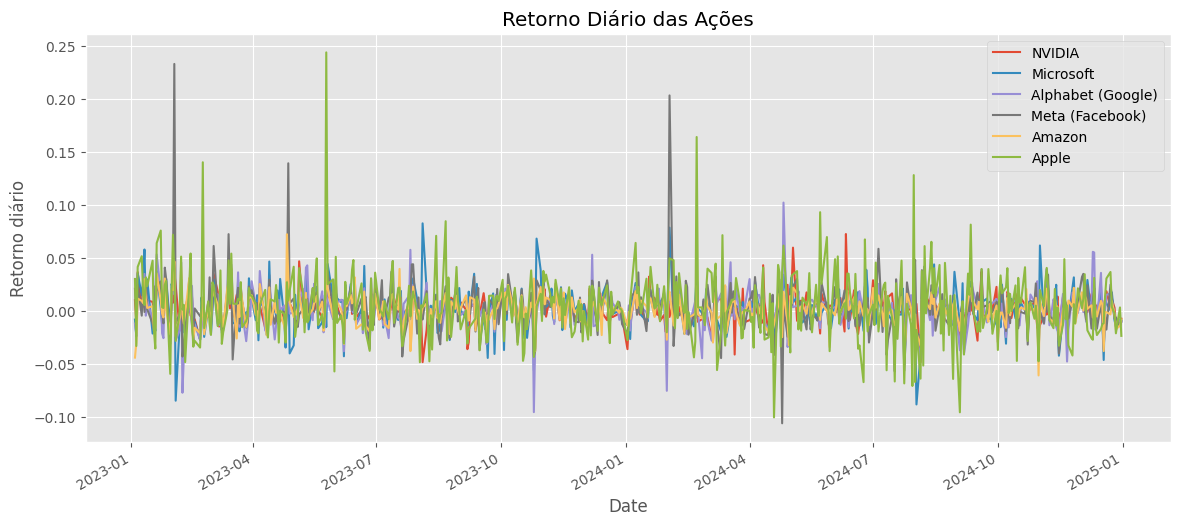

In [6]:
returns = data.pct_change().dropna()
returns.plot(figsize=(14, 6), title="Retorno Diário das Ações")
plt.ylabel("Retorno diário")
plt.show()


## Correlação entre as ações

In [7]:
correlation = returns.corr()
correlation


,NVIDIA,Microsoft,Alphabet (Google),Meta (Facebook),Amazon,Apple
NVIDIA,1.000000,0.388158,0.440353,0.381354,0.505358,0.343259
Microsoft,0.388158,1.000000,0.573908,0.580039,0.621330,0.405964
Alphabet (Google),0.440353,0.573908,1.000000,0.508009,0.535571,0.359855
Meta (Facebook),0.381354,0.580039,0.508009,1.000000,0.549144,0.396564
Amazon,0.505358,0.621330,0.535571,0.549144,1.000000,0.496079
Apple,0.343259,0.405964,0.359855,0.396564,0.496079,1.000000


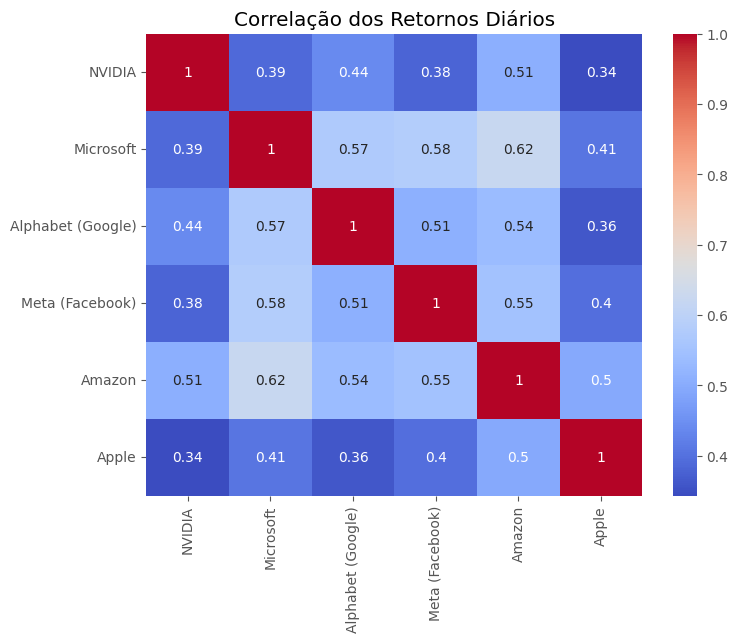

In [9]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlação dos Retornos Diários")
plt.show()


## Features das Empresas

In [10]:
df = yf.download("AAPL", start="2022-01-01")
ticker = yf.Ticker("AAPL")
info = ticker.info

/tmp/ipykernel_15960/3187971246.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2022-01-01")
[*********************100%***********************]  1 of 1 completed


In [11]:
info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [14]:
type(ticker.cashflow)

pandas.core.frame.DataFrame

In [ ]:
ticker.financials                 # Demonstrativo de resultados (income statement)
ticker.balance_sheet              # Balanço patrimonial
ticker.cashflow.head()            # Fluxo de caixa

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,108807000000.0,99584000000.0,111443000000.0,92953000000.0,NaN
Repurchase Of Capital Stock,-94949000000.0,-77550000000.0,-89402000000.0,-85971000000.0,NaN
Repayment Of Debt,-9958000000.0,-11151000000.0,-9543000000.0,-8750000000.0,NaN
Issuance Of Debt,0.0,5228000000.0,5465000000.0,20393000000.0,NaN
Issuance Of Capital Stock,NaN,NaN,NaN,1105000000.0,880000000.0


In [16]:
ticker.dividends.head()

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
Name: Dividends, dtype: float64